In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import datasets, transforms, models
from torch.autograd import Variable
from zipfile import ZipFile
import os
from os import path
import shutil

In [ ]:
import os
print(os.listdir(("/content/drive/My Drive/")))

['Classroom', 'IMG_20190611_150607.jpg', 'IMG_20190611_150339.jpg', 'IMG_20190611_150411.jpg', 'IMG_20190611_150404.jpg', 'IMG_20190912_223735.jpg', 'IMG_20190912_223722.jpg', 'CSE 3200', 'OnlineC1Temp', 'prioritySheduling.cpp', 'roundRobin.cpp', 'FB_IMG_1560243332619.jpg', '20626349_908169069324367_6531878284942323371_o (2) (1).jpg', 'Untitled form (1).gform', 'D043R.rar', 'Colab Notebooks', 'D043R (7).zip', 'D043R (6).zip', 'D043R (5).zip', 'Detailed Written Version Of The Creative Contents For YSSE Youth Ambassador Recruitment 2020 by Fardin Alam Shadhin.pdf', 'D043R (4).zip', 'D043R (3).zip', 'YSSE Demo.gsheet', 'DCom.pdf', 'D043R (2).zip', 'D043R (1).zip', 'D043R.zip', 'C1_170104119 (2).zip', '170104119 (1).zip', 'Presentation3Use-case (1).pdf', 'Presentation3Use-case.pdf', 'Group2_C1.pdf', '170104119.zip', 'C1_170104119 (1).zip', 'Login.rar', 'C1_170104119_FirstFit_worstFit_BestFit.zip', '170104119.pdf', 'C1_170104119.zip', 'UserDB_log.ldf', 'UserDB.mdf', 'C1_170104142.zip', 'YSS

In [ ]:
path = "/content/drive/My Drive/"

dataset_C = path + 'Dataset C.zip'
with ZipFile(dataset_C, 'r') as zip:
  zip.extractall()

In [ ]:
PATH = '/content/'
data_labels = pd.read_csv(PATH + 'training-c.csv', usecols = ['filename', 'digit'])
print(data_labels.shape)
data_labels.head()

(24298, 2)


,filename,digit
0,c00000.png,6
1,c00001.png,1
2,c00002.png,3
3,c00003.png,2
4,c00004.png,7


In [ ]:
TRAIN_PATH = "/content/drive/My Drive/Train"
os.mkdir(TRAIN_PATH)

def processImages(folder_name):
  src = "/content/" + folder_name + '/'
  dir_folders = os.listdir(src)
  for dir_name in dir_folders:
    file_name = os.path.join(src, dir_name)
    if os.path.isfile(file_name):
      shutil.copy(file_name, TRAIN_PATH) 

processImages('training-c')

In [ ]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [ ]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [ ]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        transforms.Resize(28),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

train_data  = Dataset(data_labels, TRAIN_PATH, train_transform)
test_data = Dataset(data_labels, TRAIN_PATH, test_transform)



In [ ]:
batch_size = 350
num_iters = 30000
input_dim = 28*28 
num_hidden = 300 
output_dim = 10

learning_rate = 0.01  

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

432


In [ ]:
test_size = 0.2
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
train_idx, test_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:56
Test dataloader:14


In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.ReLU()
 
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.ReLU()
 
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.Softmax(dim=0)
 
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.ReLU()
 
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        self.relu_5= nn.ReLU()
 
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        self.relu_6 = nn.ReLU()
 
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        out = self.relu_6(out)
        
        probas  = self.linear_out(out)
        return probas


In [ ]:
model = DeepNeuralNetworkModel(input_size = input_dim, num_classes = output_dim, num_hidden = num_hidden)

model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=300, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=300, out_features=300, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=300, out_features=300, bias=True)
  (relu_3): Softmax(dim=0)
  (linear_4): Linear(in_features=300, out_features=300, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=300, out_features=300, bias=True)
  (relu_5): ReLU()
  (linear_6): Linear(in_features=300, out_features=300, bias=True)
  (relu_6): ReLU()
  (linear_out): Linear(in_features=300, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adamax(model.parameters(), lr=learning_rate)

In [ ]:
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print('Epoch: ', epoch + 1)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images) 

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        iter += 1

        if iter % 500 == 0:        
            correct = 0
            total = 0
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                outputs = model(images)

                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)

                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Iteration: 500. Loss: 1.7704663276672363. Accuracy: 38.56760650339576
Epoch:  10
Epoch:  11
Epoch:  12
Epoch:  13
Epoch:  14
Epoch:  15
Epoch:  16
Epoch:  17
Epoch:  18
Iteration: 1000. Loss: 0.9347795844078064. Accuracy: 64.9722165054538
Epoch:  19
Epoch:  20
Epoch:  21
Epoch:  22
Epoch:  23
Epoch:  24
Epoch:  25
Epoch:  26
Epoch:  27
Iteration: 1500. Loss: 0.5606016516685486. Accuracy: 75.30356040337519
Epoch:  28
Epoch:  29
Epoch:  30
Epoch:  31
Epoch:  32
Epoch:  33
Epoch:  34
Epoch:  35
Epoch:  36
Iteration: 2000. Loss: 0.3942268192768097. Accuracy: 79.19324963984359
Epoch:  37
Epoch:  38
Epoch:  39
Epoch:  40
Epoch:  41
Epoch:  42
Epoch:  43
Epoch:  44
Epoch:  45
Iteration: 2500. Loss: 0.24090519547462463. Accuracy: 80.07820539205598
Epoch:  46
Epoch:  47
Epoch:  48
Epoch:  49
Epoch:  50
Epoch:  51
Epoch:  52
Epoch:  53
Epoch:  54
Iteration: 3000. Loss: 0.18159811198711395. Accuracy: 81.8275

In [ ]:
#settings 1
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), path + 'assignment2_model.pkl') 

[1.7704663276672363, 0.9347795844078064, 0.5606016516685486, 0.3942268192768097, 0.24090519547462463, 0.18159811198711395, 0.22715260088443756, 0.10203585028648376, 0.08291501551866531, 0.0763048380613327, 0.046442169696092606, 0.024692300707101822, 0.03883235529065132, 0.15453088283538818, 0.032452505081892014, 0.08138242363929749, 0.030961502343416214, 0.023177068680524826, 0.03790069743990898, 0.07143961638212204, 0.026217572391033173, 0.013134746812283993, 0.02663564495742321, 0.012636248953640461, 0.016069287434220314, 0.06165703386068344, 0.023508764803409576, 0.04574590176343918, 0.04782503843307495, 0.01713939569890499, 0.019093463197350502, 0.03344385325908661, 0.00880385935306549, 0.014661023393273354, 0.00748130539432168, 0.002354151802137494, 0.023125814273953438, 0.01748194545507431, 0.0018441157881170511, 0.009359064511954784, 0.011075960472226143, 0.06137864664196968, 0.013514259830117226, 0.010233347304165363, 0.0021437855903059244, 0.0068382821045815945, 0.013714092783

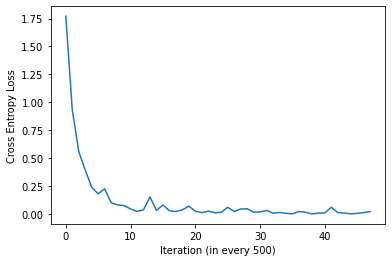

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
print("Final Model Loss: ",iteration_loss[-1])
print ("Final Model Accuracy: ",accuracy)

Final Model Loss:  0.022804323583841324
Final Model Accuracy:  82.91829594566784


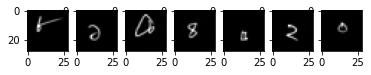

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
for images, labels in test_loader:
    break
    
fig, ax = plt.subplots(1, 7)
for i in range(7):
    ax[i].imshow(images[i].view(28,28), cmap=matplotlib.cm.binary)

plt.show()